In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

df1 = pd.read_csv("../all-data.csv")


In [6]:
drop_columns = [
    "Pwm_State_1[Raw]",
    "Pwm_State_2[Raw]",
    "TransientThrottlePercentageEnrich[Percentage]",
    "TransientThrottlePercentageAsync[Percentage]",
    "TransientThrottleEnrichDecayRate[msPerEngCyl]",
    "TransientThrottleEnrichSensitivity[Time_us]",
    "TransientThrottleAccelCoolantCorr[Percentage]",
    "IgnitionAirTempCorrection[Angle]",
    "IgnitionCoolantTempCorrection[AngleOffset10deg]",
    "ShiftLight1[Raw]",
    "FuelCoolantTempCorrection[Percentage1For1]",
    "FuelAirTempCorrection[Percentage]",
    "BaseIgnition[AngleIgnSprt2K]",
    "MAPSource[Pressure]",
    "IgnitionLoad[Pressure]",
    "CurrentDutyCycle[Percentage]",
    "time",
    "TargetAFR[AFR]",
    "Unnamed: 0"
    ]

df1.drop(drop_columns,axis=1,inplace=True)

KeyError: "['Pwm_State_1[Raw]', 'Pwm_State_2[Raw]', 'TransientThrottlePercentageEnrich[Percentage]', 'TransientThrottlePercentageAsync[Percentage]', 'TransientThrottleEnrichDecayRate[msPerEngCyl]', 'TransientThrottleEnrichSensitivity[Time_us]', 'TransientThrottleAccelCoolantCorr[Percentage]', 'IgnitionAirTempCorrection[Angle]', 'IgnitionCoolantTempCorrection[AngleOffset10deg]', 'ShiftLight1[Raw]', 'FuelCoolantTempCorrection[Percentage1For1]', 'FuelAirTempCorrection[Percentage]', 'BaseIgnition[AngleIgnSprt2K]', 'MAPSource[Pressure]', 'IgnitionLoad[Pressure]', 'CurrentDutyCycle[Percentage]', 'time', 'TargetAFR[AFR]'] not found in axis"

In [ ]:
df1['sno'] = range(1, 1+len(df1))
cols = df1.columns.delete(len(df1.columns)-1)
cols = list(cols)
cols.insert(0, "sno")
df1 = df1[cols]

df = df1
df.to_csv("../impdata.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95952 entries, 0 to 95951
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sno                             95952 non-null  int64  
 1   Unnamed: 0                      95952 non-null  int64  
 2   AFRDifference[AFR]              92117 non-null  float64
 3   BatteryVoltage[BatteryVoltage]  89971 non-null  float64
 4   EngineRunningTime[Time_s]       15682 non-null  float64
 5   IgnitionTiming[Angle]           51492 non-null  float64
 6   Load[Pressure]                  89720 non-null  float64
 7   AirTemp[Temperature]            32541 non-null  float64
 8   CoolantTemp[Temperature]        34063 non-null  float64
 9   LambdaSensor1[AFR]              92057 non-null  float64
 10  ThrottlePosition[Percentage]    41242 non-null  float64
 11  BaseFuel[Percentage]            86013 non-null  float64
 12  RPM[EngineSpeed]                

In [ ]:
corr_matrix = round(df.corr(),2)
corr_matrix

,sno,Unnamed: 0,AFRDifference[AFR],BatteryVoltage[BatteryVoltage],EngineRunningTime[Time_s],IgnitionTiming[Angle],Load[Pressure],AirTemp[Temperature],CoolantTemp[Temperature],LambdaSensor1[AFR],ThrottlePosition[Percentage],BaseFuel[Percentage],RPM[EngineSpeed]
sno,1.00,-0.03,0.08,0.08,-0.09,-0.32,0.12,-0.06,-0.07,-0.05,0.03,0.08,-0.01
Unnamed: 0,-0.03,1.00,-0.40,-0.37,0.94,-0.29,-0.17,0.85,0.80,0.42,-0.04,-0.07,0.05
AFRDifference[AFR],0.08,-0.40,1.00,0.37,-0.42,0.41,-0.34,-0.44,-0.37,-0.97,-0.28,-0.32,0.05
BatteryVoltage[BatteryVoltage],0.08,-0.37,0.37,1.00,-0.38,0.17,-0.12,-0.53,-0.35,-0.37,0.12,-0.09,0.17
EngineRunningTime[Time_s],-0.09,0.94,-0.42,-0.38,1.00,-0.27,-0.17,0.83,0.79,0.44,-0.07,-0.08,0.04
IgnitionTiming[Angle],-0.32,-0.29,0.41,0.17,-0.27,1.00,-0.63,-0.36,-0.35,-0.36,-0.37,-0.52,0.18
Load[Pressure],0.12,-0.17,-0.34,-0.12,-0.17,-0.63,1.00,-0.12,-0.15,0.28,0.78,0.94,0.22
AirTemp[Temperature],-0.06,0.85,-0.44,-0.53,0.83,-0.36,-0.12,1.00,0.90,0.46,-0.09,-0.02,-0.00
CoolantTemp[Temperature],-0.07,0.80,-0.37,-0.35,0.79,-0.35,-0.15,0.90,1.00,0.39,-0.07,-0.05,0.03
LambdaSensor1[AFR],-0.05,0.42,-0.97,-0.37,0.44,-0.36,0.28,0.46,0.39,1.00,0.26,0.28,0.04


<AxesSubplot: >

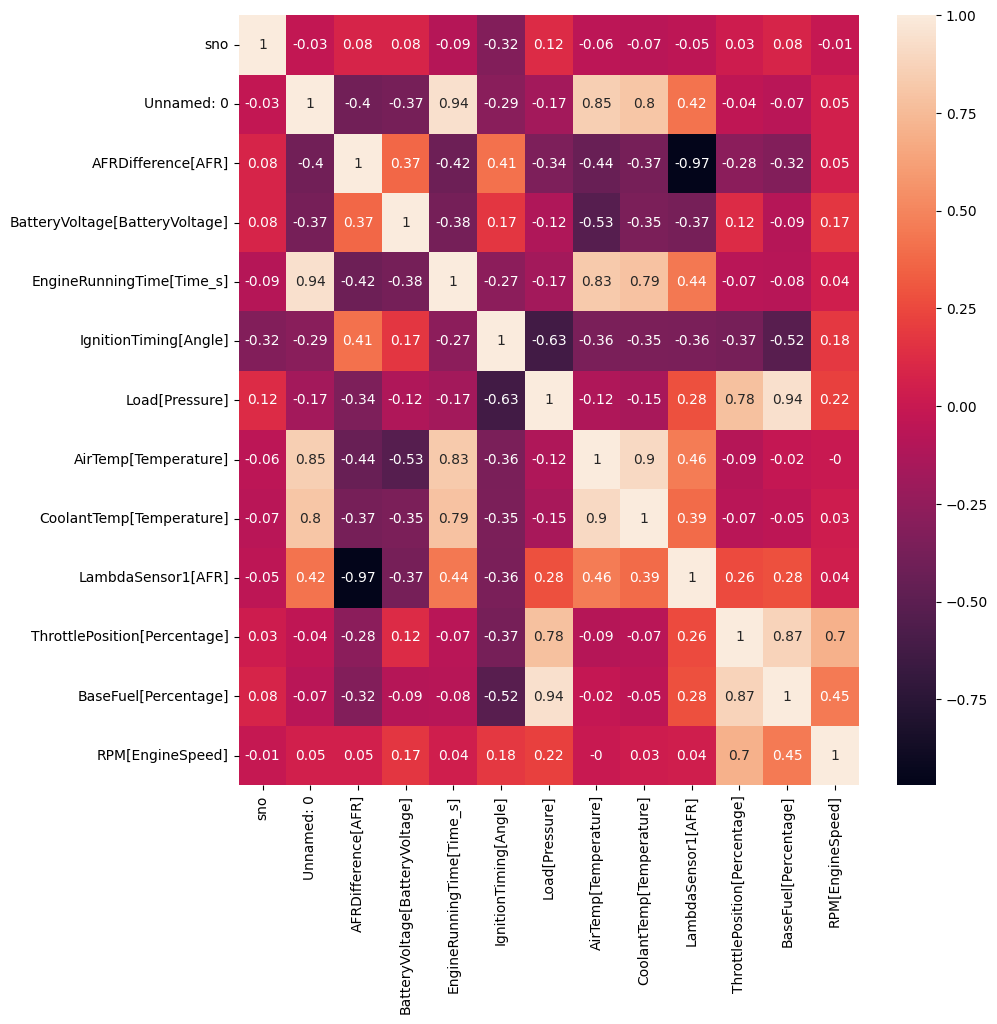

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,ax=ax)

In [ ]:
# df.plot(x="LambdaSensor1[AFR]",y="S.No",kind="line",figsize=(10,10))
plt.scatter(df.iloc[:12000,0],df.iloc[:12000,8],s=10)
plt.xlabel("sno")
plt.ylabel("LambdaSensor1[AFR]")
plt.grid(True)

In [ ]:
plt.scatter(df.iloc[:12000,1],df.iloc[:12000,4],s=10)
plt.xlabel("AFRDifference[AFR]")
plt.ylabel("IgnitionTiming[Angle]")
plt.grid(True)

In [ ]:
plt.scatter(df.iloc[:8000,11],df.iloc[:8000,9],s=10)
plt.xlabel("RPM[EngineSpeed]")
plt.ylabel("ThrottlePosition[Percentage]")
plt.grid(True)

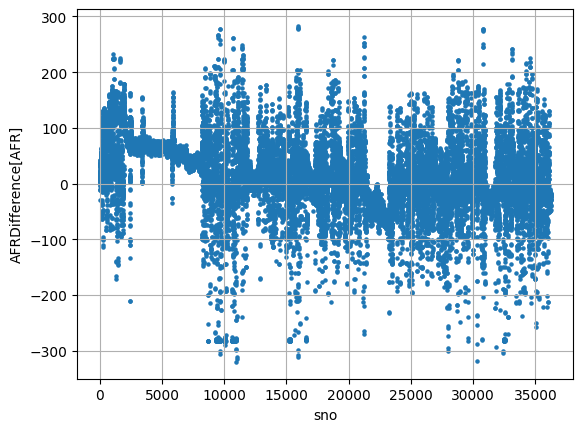

In [ ]:
trial1 = pd.read_csv('../clean_data/ECU_DATA/20180716-home2mimos.csv')
# plt.scatter(trial1.iloc[:8000,11],trial1.iloc[:8000,9],s=10)
plt.scatter(trial1["sno"],trial1["AFRDifference[AFR]"],s=5)
plt.xlabel("sno")
plt.ylabel("AFRDifference[AFR]")
plt.grid(True)

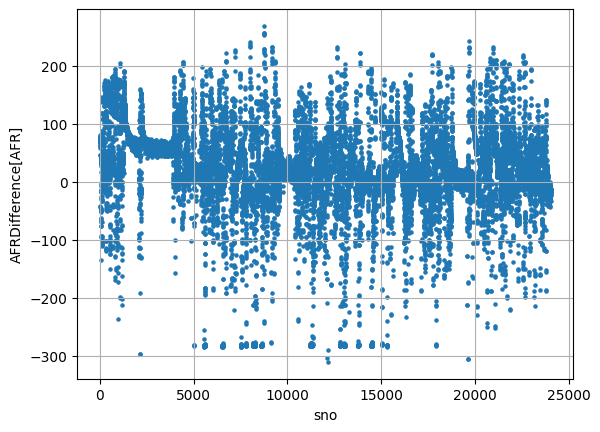

In [ ]:
trial3 = pd.read_csv('../clean_data/ECU_DATA/20180717-home2mimos.csv')
# plt.scatter(trial2.iloc[:8000,11],trial2.iloc[:8000,9],s=10)
plt.scatter(trial3["sno"],trial3["AFRDifference[AFR]"],s=5)
plt.xlabel("sno")
plt.ylabel("AFRDifference[AFR]")
plt.grid(True)